# Homework 2
## **Group 2:** *Andrew Boehm, Ayssia Nicole Crockem, Avni Patel, Isabella Peterson, Kruthik Ravikanti, Ellie Kate Watson, Margaret Ailin Wei*

[NEUR 3002 Project GitHub Repository](https://github.com/KruthikRavikanti/NEUR-3002-Project-1.git)

**What *is* an integrate and fire neuron model?**

As Dr. Steele said:
> A simplified way to simulate neuronal spiking
> behavior while focusing on key aspects like
> membrane potential dynamics and spike
> generation.

Features of an IF Model
* Membrane potential increases linearly until it reaches threshold
* Membrane potential does not decay over time
* Uses a single bit of information

**What *does* it do?**

Models the binary firing of a neuron based on whether or not an AP is fired.
When the inputs reach a threshold, the neuron fires and the membrane potential is reset back to resting potential

Functions of an IF model
1. Describe how individual neurons respond to stimuli
2. Mathematically model neurons binary response to stimuli
3. Used to visualize action potentials based on if membrane potential reaches the threshold or not.


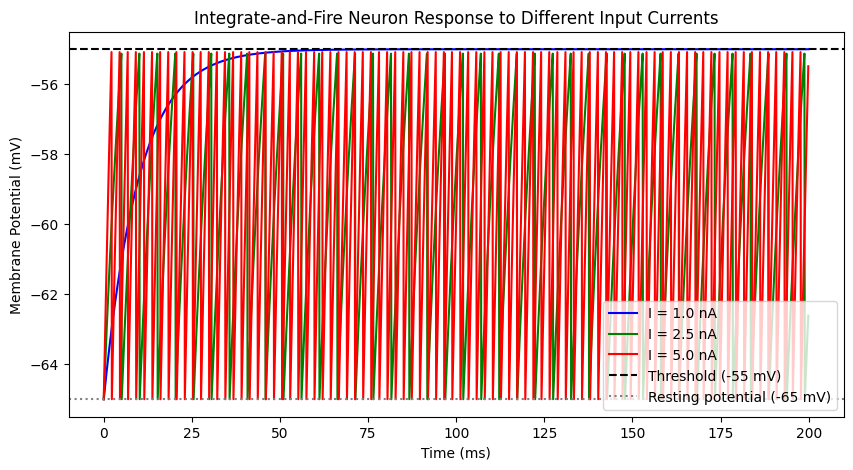

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # Time step (ms)
T = 200   # Total simulation time (ms)
time = np.arange(0, T, dt)

# Neuron parameters
tau_m = 10  # Membrane time constant (ms)
R_m = 10    # Membrane resistance (MΩ)
V_rest = -65  # Resting potential (mV)
V_thresh = -55  # Firing threshold (mV)
V_reset = -65  # Reset potential after spike (mV)

def integrate_and_fire(I, T=T, dt=dt):
    """Simulates an Integrate-and-Fire neuron given input current I."""
    V = np.full_like(time, V_rest)  # Membrane potential initialization
    spikes = []  # To store spike times

    for t in range(1, len(time)):
        dV = (-(V[t-1] - V_rest) + R_m * I) * (dt / tau_m)
        V[t] = V[t-1] + dV

        if V[t] >= V_thresh:  # Spike condition
            V[t] = V_reset
            spikes.append(time[t])  # Store spike time

    return V, spikes

# Different input currents
currents = [1.0, 2.5, 5.0]  # nA (arbitrary units)
colors = ['b', 'g', 'r']

plt.figure(figsize=(10, 5))

for I, color in zip(currents, colors):
    V, spikes = integrate_and_fire(I)
    plt.plot(time, V, label=f'I = {I} nA', color=color)

# Add labels and legend
plt.axhline(V_thresh, linestyle='--', color='black', label="Threshold (-55 mV)")
plt.axhline(V_rest, linestyle=':', color='gray', label="Resting potential (-65 mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Integrate-and-Fire Neuron Response to Different Input Currents")
plt.legend()
plt.show()



## HW Questions

### Discussion
1. Looking at the above visualization / based on what you know regarding the LIF model -- what aspect of this model is most unlike a real biological neuron? What is missing? Additionally what aspects are like a biological neuron? Compare and Contrast the two.

**Answer**
1. The LIF model incorporates leaky ion channels, which is more biologically accurate compared to the original I&F model, as the membrane potential more naturally decays compared to the binary mechanism of the I&F model. However, this model still lacks a lot, including the opening and closing of voltage-gated channels that drive depolarization and repolarization in a biological neuron. This model also lacks a refractory period, as after every action potential it still immediately returns the membrane potential to the resting state potential, just with a more natural decay, and then back to the threshold, which is not how a biological neuron would act. A biological neuron would have both absolute and relative refractory periods in which the neuron would be unable to fire or there would be less firing, respectively.

### Reflection
1. *What was the most challenging aspect of this homework?*
2. *Estimate the amount of time this project took*

**Answer**
1. The most challenging part of this homework was bridging the gap between computer science and biology of the neuron. Some of us haven't worked much with CS so being able to connect these concepts was difficult and there was definitely a learning curve. However, after spending some time with the assignment, we found that it was much more intuitive than we thought, especially since we had a strong understanding of the biological concepts.  
2. The project took about an hour and a half. This includes the generation of the code using ChatGPT and answering the questions. We split up the questions amongst all our teamates.